In [18]:
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('finsmart_transactions.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   client_id           10000 non-null  int64  
 1   group               10000 non-null  object 
 2   conversion          10000 non-null  int64  
 3   transaction_amount  10000 non-null  float64
 4   channel             10000 non-null  object 
 5   date                10000 non-null  object 
 6   product_type        10000 non-null  object 
 7   region              10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB
None


In [15]:
conv_A = df[df['group'] == 'A']['conversion'].mean()
conv_B = df[df['group'] == 'B']['conversion'].mean()

print(f'Конверсия А: {conv_A:3f}, B: {conv_B:3f}')

count = df.groupby('group')['conversion'].sum().values
nobs = df.groupby('group')['conversion'].count().values

stat, pval = proportions_ztest(count, nobs)
print(f'p-value: {pval:.4f}')

Конверсия А: 0.123522, B: 0.157799
p-value: 0.0000


In [17]:
df['date'] = pd.to_datetime(df['date'])

arpu = df['transaction_amount'].sum() / df['client_id'].nunique()

avg_check = df['transaction_amount'].mean()

client_days = df.groupby('client_id')['date'].nunique()
retention_rate = (client_days > 1).mean()

dau = df.groupby('date')['client_id'].nunique()

df['month'] = df['date'].dt.to_period('M')
mau = df.groupby('month')['client_id'].nunique()

print(f"ARPU: {arpu:.2f}")
print(f"Средний чек: {avg_check:.2f}")
print(f"Retention (вернулся ещё раз): {retention_rate:.2%}")
print("DAU (первые 5 дней):")
print(dau.head())
print("MAU:")
print(mau)

ARPU: 35.71
Средний чек: 35.71
Retention (вернулся ещё раз): 0.00%
DAU (первые 5 дней):
date
2025-06-01    121
2025-06-02    123
2025-06-03    110
2025-06-04    123
2025-06-05    111
Name: client_id, dtype: int64
MAU:
month
2025-06    3395
2025-07    3342
2025-08    3263
Freq: M, Name: client_id, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_26924\599190228.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mau.index.astype(str), y=mau.values, palette="Blues_d")


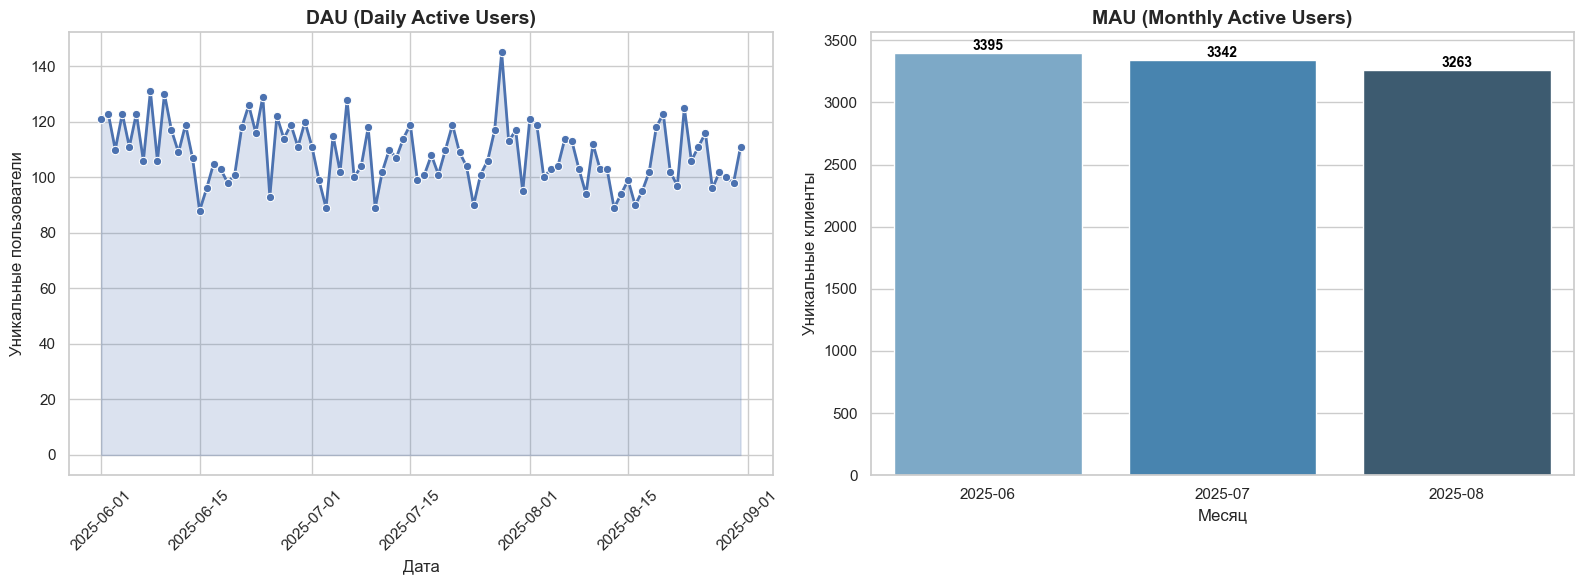

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))

# DAU 
plt.subplot(1, 2, 1)
sns.lineplot(x=dau.index, y=dau.values, marker='o', color="#4C72B0", linewidth=2)
plt.fill_between(dau.index, dau.values, alpha=0.2, color="#4C72B0")
plt.title("DAU (Daily Active Users)", fontsize=14, fontweight="bold")
plt.xlabel("Дата")
plt.ylabel("Уникальные пользователи")
plt.xticks(rotation=45)

# MAU
plt.subplot(1, 2, 2)
ax = sns.barplot(x=mau.index.astype(str), y=mau.values, palette="Blues_d")
plt.title("MAU (Monthly Active Users)", fontsize=14, fontweight="bold")
plt.xlabel("Месяц")
plt.ylabel("Уникальные клиенты")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color="black", fontweight="bold")

plt.tight_layout()
plt.show()

📊 Резюме по метрикам

ARPU (Average Revenue Per User): 35.71

Средняя выручка на одного уникального клиента.

Значение стабильное и совпадает со средним чеком → значит, что клиенты совершают в среднем по одной транзакции за период.

Средний чек: 35.71

Каждая транзакция приносит ~35.71 условных единиц.

Так как ARPU = среднему чеку, можно сделать вывод, что повторных транзакций у клиентов почти нет.

Retention (вернулся ещё раз): 0%

Ни один клиент не совершал покупки в разные дни.

Это критическая точка: продукт не удерживает клиентов, они совершают единичную покупку и не возвращаются.

DAU (Daily Active Users): ~90–140 клиентов в день

Активность достаточно стабильная.

Есть небольшие колебания, но нет сильных пиков/провалов.

MAU (Monthly Active Users): 3260–3400

На протяжении трёх месяцев MAU остаётся примерно на одном уровне.

Лёгкое снижение в августе может сигнализировать о сезонности или падении интереса.


🔍 Выводы и интерпретация

Продукт привлекает новых пользователей (MAU и DAU стабильные), но не удерживает их (Retention = 0%).

Клиенты совершают только одну транзакцию, что подтверждается совпадением ARPU и среднего чека.

В текущей ситуации рост выручки возможен только за счёт привлечения новых клиентов, а не за счёт повторных покупок.

Это опасная стратегия → нужно работать над удержанием.

💡 Рекомендации

Удержание клиентов (Retention):

Ввести механики лояльности (кэшбэк, скидки на повторные покупки).

Отправлять напоминания / push-уведомления.

Добавить персональные рекомендации.

Рост ARPU:

Стимулировать повторные транзакции (акции “купи 2 — получи скидку”).

Предложить апсейл/кроссейл (например, сопутствующие продукты).

Аналитика следующего шага:

Разбить клиентов по сегментам (новые, активные, ушедшие).

Провести A/B тестирование механик удержания.

Отслеживать динамику ARPU и retention после внедрения изменений.